In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [27]:
caminho_arquivo = './dados/MICRODADOS_ENEM_2023.csv'
data = pd.read_csv(caminho_arquivo, encoding='latin1', sep=';')
num_columns = data.shape[1]
num_rows = data.shape[0]
print(f"Número de colunas: {num_columns}")
print(f"Número de linhas: {num_rows}")
data.head()

Número de colunas: 76
Número de linhas: 3933955


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [28]:
# Dicionário para mapear as respostas da questão Q006 (faixa de renda) em classes sociais
mapa_renda = {
    'A': 'E',
    'B': 'D',
    'C': 'D',
    'D': 'C',
    'E': 'C',
    'F': 'B',
    'G': 'B',
    'H': 'A',
    'I': 'A',
    'J': 'A',
    'K': 'A',
    'L': 'A',
    'M': 'A',
    'N': 'A',
    'O': 'A',
}

# Criar nova coluna 'classe_social' baseada na resposta da questão Q006
data['classe_social'] = data['Q006'].map(mapa_renda)

In [29]:
dados_selecionados = data[['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q007','Q008','Q009','Q010','Q011',
                       'Q012','Q013','Q014','Q015','Q016',
                       'Q017','Q018','Q019','classe_social']]

In [ ]:
#função tratar nulos
def tratarNulos(dados):
    dataset = dados.copy()  # evita problemas de referência
    
    # calcular a moda de forma segura
    moda_TP_ENSINO = dataset['TP_ENSINO'].mode()
    
    dataset['TP_ENSINO'] = dataset['TP_ENSINO'].fillna(moda_TP_ENSINO.iloc[0])
    
    return dataset

In [33]:
# Verificar colunas com valores nulos
nulos = dados_selecionados.isnull().sum()
colunas_com_nulos = nulos[nulos > 0]
print(colunas_com_nulos)

dataset_sem_nulos = tratarNulos(dados_selecionados)
print("-----!!!!-----")

# Verificar colunas com valores nulos
nulos = dataset_sem_nulos.isnull().sum()
colunas_com_nulos = nulos[nulos > 0]
print(colunas_com_nulos)

TP_ENSINO             2594874
TP_LOCALIZACAO_ESC    2975449
NU_NOTA_CN            1241528
NU_NOTA_CH            1111312
NU_NOTA_LC            1111312
NU_NOTA_MT            1241528
NU_NOTA_REDACAO       1111312
classe_social           89594
dtype: int64
-----!!!!-----
TP_LOCALIZACAO_ESC    2975449
NU_NOTA_CN            1241528
NU_NOTA_CH            1111312
NU_NOTA_LC            1111312
NU_NOTA_MT            1241528
NU_NOTA_REDACAO       1111312
classe_social           89594
dtype: int64


In [6]:
dados_selecionados = dados_selecionados.dropna()
num_columns = dados_selecionados.shape[1]
num_rows = dados_selecionados.shape[0]
print(f"Número de colunas: {num_columns}")
print(f"Número de linhas: {num_rows}")
dados_selecionados.head()

Número de colunas: 29
Número de linhas: 681489


,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_LOCALIZACAO_ESC,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,classe_social
3,2,F,1,3,1,2,0,2,1.0,1.0,...,A,B,A,A,A,A,A,A,B,D
4,3,F,1,3,1,2,0,2,1.0,1.0,...,A,B,A,A,A,A,A,A,B,D
11,3,M,1,3,4,2,0,2,1.0,1.0,...,A,B,A,B,A,A,A,A,B,C
16,4,F,1,1,1,2,0,2,1.0,1.0,...,A,B,A,A,A,A,A,A,B,D
41,3,M,1,1,1,2,0,2,1.0,1.0,...,A,B,A,B,A,A,A,A,B,C


In [7]:
# 1. Separar X e y
X = dados_selecionados.drop(columns=['classe_social'])
y = dados_selecionados['classe_social']

# 2. Identificar colunas categóricas e numéricas
categoricas = X.select_dtypes(include=['object']).columns.tolist()
numericas = X.select_dtypes(exclude=['object']).columns.tolist()

# 3. Pré-processamento (OneHot para categóricas, passthrough para numéricas)
preprocessador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas),
        ('num', 'passthrough', numericas)
    ]
)

clf = DecisionTreeClassifier(
    criterion="gini",
    splitter="best",
    max_depth=None,          # sem limite de profundidade
    min_samples_split=2,     # pode dividir até com 2 amostras
    min_samples_leaf=1,      # folhas com 1 amostra
    max_features=None,       # usa todos os atributos
    random_state=42
)

# 4. Criar pipeline com pré-processamento + modelo
modelo = Pipeline(steps=[
    ('preprocessador', preprocessador),
    ('classificador', clf) 
])



# 6. Treinar modelo
modelo.fit(X, y)

# 7. Avaliar
y_pred = modelo.predict(X)
print("Acurácia:", accuracy_score(y, y_pred))
print("\nRelatório de classificação:\n", classification_report(y, y_pred))
print("\nMatriz de confusão:\n", confusion_matrix(y, y_pred))

# 8. Visualizar a árvore em texto
arvore_texto = export_text(modelo.named_steps['classificador'],
                           feature_names=modelo.named_steps['preprocessador'].get_feature_names_out())
print(arvore_texto)

Acurácia: 1.0

Relatório de classificação:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00    137954
           B       1.00      1.00      1.00    100478
           C       1.00      1.00      1.00    135448
           D       1.00      1.00      1.00    279680
           E       1.00      1.00      1.00     27929

    accuracy                           1.00    681489
   macro avg       1.00      1.00      1.00    681489
weighted avg       1.00      1.00      1.00    681489


Matriz de confusão:
 [[137954      0      0      0      0]
 [     0 100478      0      0      0]
 [     0      0 135448      0      0]
 [     0      0      0 279680      0]
 [     0      0      0      0  27929]]
|--- cat__Q010_A <= 0.50
|   |--- num__TP_ESCOLA <= 2.50
|   |   |--- cat__Q008_B <= 0.50
|   |   |   |--- cat__Q018_A <= 0.50
|   |   |   |   |--- cat__Q008_C <= 0.50
|   |   |   |   |   |--- cat__Q007_A <= 0.50
|   |   |   |   |   |   |--- num__NU_NOTA

In [ ]:
feature_names = modelo.named_steps['preprocessador'].get_feature_names_out()

# Pegar as classes
class_names = modelo.named_steps['classificador'].classes_
plt.figure(figsize=(20,10))
plot_tree(
    modelo.named_steps['classificador'],   # árvore treinada dentro do pipeline
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()

KeyboardInterrupt: 

77
Importância das features:
Feature NU_NOTA_MT: 0.1259
Feature Q010_A: 0.1213
Feature NU_NOTA_CN: 0.1186
Feature NU_NOTA_LC: 0.1177
Feature NU_NOTA_CH: 0.1172
Feature NU_NOTA_REDACAO: 0.0822
Feature TP_ESCOLA: 0.0495
Feature TP_FAIXA_ETARIA: 0.0253
Feature TP_COR_RACA: 0.0238
Feature Q008_B: 0.0179
Feature Q014_A: 0.0177
Feature Q007_A: 0.0109
Feature Q018_A: 0.0104
Feature TP_SEXO_F: 0.0091
Feature TP_SEXO_M: 0.0088
Feature Q011_A: 0.0087
Feature Q011_B: 0.0081
Feature Q013_A: 0.0078
Feature Q013_B: 0.0070
Feature Q009_D: 0.0069
Feature Q009_C: 0.0069
Feature TP_ESTADO_CIVIL: 0.0066
Feature Q016_A: 0.0055
Feature Q015_A: 0.0054
Feature Q015_B: 0.0054
Feature Q019_B: 0.0052
Feature Q016_B: 0.0048
Feature Q019_C: 0.0047
Feature Q008_C: 0.0043
Feature Q011_C: 0.0036
Feature TP_LOCALIZACAO_ESC: 0.0036
Feature Q009_E: 0.0034
Feature Q010_B: 0.0034
Feature Q019_D: 0.0034
Feature TP_NACIONALIDADE: 0.0033
Feature Q012_B: 0.0030
Feature Q018_B: 0.0029
Feature Q012_C: 0.0028
Feature Q019_A: 0.

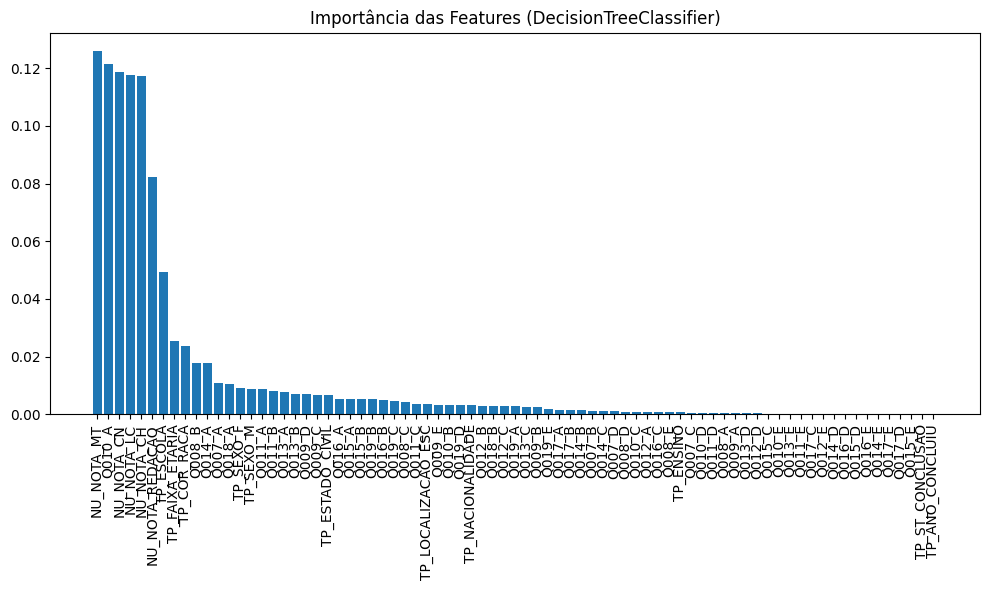

In [8]:
nomes_features = modelo.named_steps['preprocessador'].get_feature_names_out()
nomes_features = [nome.split("__")[1] for nome in nomes_features]

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]  # ordenar do mais importante pro menos
print(len(indices))


# Print em texto
print("Importância das features:")
#print(X)
for i in indices:
    print(f"Feature {nomes_features[i]}: {importances[i]:.4f}")

# 3. Gráfico
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [nomes_features[i] for i in indices], rotation=90)
plt.title("Importância das Features (DecisionTreeClassifier)")
plt.tight_layout()
plt.show()